<h1>Алгоритм Кока — Янгера — Касами</h1>

In [50]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [51]:
#Проверяемая строка
check = "aabb"

#Грамматика языка
grammar =[
    {"S": ("A", "C")},
    {"S": ("A", "B")},
    {"C": ("S", "B")},
    {"A": "a"},
    {"B": "b"}
]

#Множество начальных символов
start = ["S"]

In [52]:
#Длинна строки
n = len(check)

<p>Делим правила:</p>
<p>В final пойдут правила вида A -> a </p>
<p>В nfinal пойдут правила вида A -> BC </p> 

In [53]:
final = []
nfinal = []

for gr in grammar:
    [[left, right]] = gr.items()
    if len(right) == 1:
        final.append(gr)
    else:
        nfinal.append(gr)


Создаем таблицу NxN для хранения треугольника

In [54]:
P = [[[] for row in range(n)] for x in range(n)]

Первый цикл алгоритма - расстановка по правилам A -> a в первой строке

In [55]:
for i in range(n):
    for j in range(len(final)): 
        [[left, right]] = final[j].items()
        if check[i] in right:
            P[0][i].append(left)

Заполняем таблицу до конца

In [56]:
for i in range(1, n):
    for j in range(n-i):
        for k in range(i):
            for nf in nfinal:
                [[left, right]] = nf.items()
                if right[0] in P[k][j] and right[1] in P[i-k-1][j+k+1]:
                    P[i][j].append(left)

Отрисовываем таблицу

Слово принадлежит языку


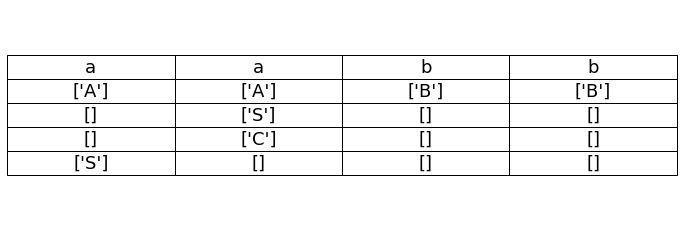

In [66]:
result = False
for i in P[n-1][0]:
    if i in start:
        result = True
        break;

if result:
    print("Слово распознано")
else:
    print("Слово не распознано")

fig, axs = plt.subplots(1,1)

table = axs.table(cellText=np.array(P), colLabels=list(check), fontsize=80, loc='center', cellLoc='center')
table.set_fontsize(18)
table.scale(2, 2)  # may help

plt.axis('off')
plt.show()